In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
import pickle

In [3]:
df = pd.read_csv('Bank Customer Churn Prediction Dataset.csv')

In [4]:
# replace values in gender column with 1 and 0
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})

In [5]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [6]:
#check for imbalance
df.churn.value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [7]:
lis = ['credit_score', 'gender', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']
for i in df.columns:
  if i not in lis:
    df.drop(i, inplace=True, axis=1)

In [8]:
df

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,42,3,75075.31,2,1,0,92888.52,1


In [9]:
X = df.drop('churn', axis = 'columns')
y = df['churn']

In [10]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy= 'minority')

In [11]:
X,y = smote.fit_resample(X,y)

In [12]:
#check for imbalance after smote
y.value_counts()

1    7963
0    7963
Name: churn, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=101, stratify=y)
rfc = RandomForestClassifier(n_estimators=300, max_features=2, min_samples_split=10)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [14]:
# classification report for random forest
print(classification_report(y_test, y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1593
           1       0.85      0.81      0.83      1593

    accuracy                           0.83      3186
   macro avg       0.83      0.83      0.83      3186
weighted avg       0.83      0.83      0.83      3186



[[1361  232]
 [ 304 1289]]


In [15]:
# boosting with ada boost
ada = AdaBoostClassifier(base_estimator=rfc, n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [16]:
# classification report after boost
print(classification_report(y_test, y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1593
           1       0.86      0.84      0.85      1593

    accuracy                           0.85      3186
   macro avg       0.85      0.85      0.85      3186
weighted avg       0.85      0.85      0.85      3186



[[1369  224]
 [ 258 1335]]


In [17]:
file_name = 'RetainMe_Model.pkl'
pickle.dump(ada, open(file_name, 'wb'))

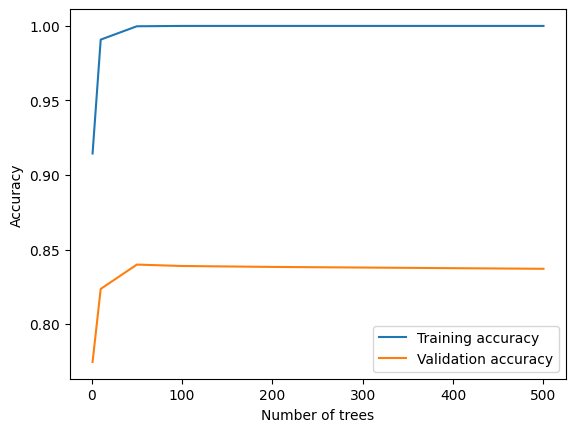

In [18]:
# Define range of number of trees
num_trees = [1, 10, 50, 100, 200, 500]

# Initialize lists to store accuracy scores
train_scores = []
val_scores = []

# Train and evaluate model for each value of num_trees
for n in num_trees:
    rf = RandomForestClassifier(n_estimators=n)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_scores.append(train_acc)
    val_pred = rf.predict(X_test)
    val_acc = accuracy_score(y_test, val_pred)
    val_scores.append(val_acc)

# Plot the complexity curve
plt.plot(num_trees, train_scores, label='Training accuracy')
plt.plot(num_trees, val_scores, label='Validation accuracy')
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.legend()
plt.show()